In [3]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

% matplotlib inline

In [1]:
def DFT_mat(x):
    N = len(x)
    Wn = np.exp(-2J*np.pi/N)
    l_w = Wn**np.arange(N)
    D = (l_w.reshape(-1,1))**np.arange(N)
    return D.dot(x)

In [2]:
def IDFT_mat(x):
    N = len(x)
    Wn = np.exp(-2J*np.pi/N)
    l_w = Wn**np.arange(0, -N, -1)
    D = (l_w.reshape(-1,1))**np.arange(N)/N
    return D.dot(x)

In [4]:
def normal_dft(x,y):
    a = time()
    X = DFT_mat(x)
    Y = DFT_mat(x)
    b = time()
    return b-a

In [10]:
def fast_dft(x, y):
    N = len(x)
    a = time()
    z = x+1J*y
    Z = DFT_mat(z)
    X = [0.5*(Z[i]+np.conj(Z[(-i)%N])) for i in range(N)]
    Y = [-0.5J*(Z[i]-np.conj(Z[(-i)%N])) for i in range(N)]
    b = time()
    return b-a

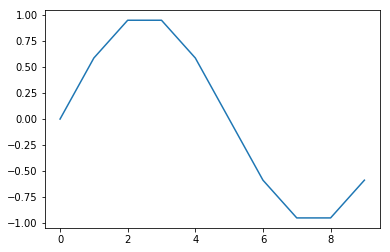

In [6]:
f = 10
N = 10
t = np.linspace(0, 1/f, N+1)[:-1]
x = np.sin(2*np.pi*t*f)

plt.plot(x)

In [36]:
def make_x(N, f = 10):
    t = np.linspace(0, 1/f, N+1)[:-1]
    x = np.sin(2*np.pi*t*f)
    return x

In [101]:
def time_normal():
    t = []
    for N in range(10, 100):
        x = make_x(N)
        t.append(sum([normal_dft(x,x) for i in range(5)])/5)
    return t

In [102]:
def time_fast():
    t = []
    for N in range(10, 100):
        x = make_x(N)
        t.append(sum([fast_dft(x,x) for i in range(5)])/5)
    return t

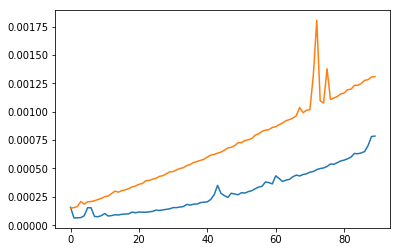

In [103]:
plt.plot(time_normal())
plt.plot(time_fast())